## Final Project Submission

Please fill out:
* Student name: Hilary Simiyu
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


# LOAN APPROVAL ANALYSIS FOR THE BANK OF INDIA

## Business Understanding

### Overview
The loan approval project aims to develop a predictive model that can reliably assess an applicant's chances of getting a loan based on their financial and personal characteristics. This approach uses machine learning algorithms and historical data to improve and automate decision-making. By analyzing patterns and trends within the data, the model can provide reliable recommendations, thus aiding the Bank of India, the stakeholder of this project, in reducing the time and resources spent on manual evaluations and improving the consistency of loan approval decisions.

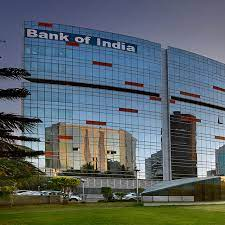

#### Challenges
The major challenge in developing a loan approval model is the high reliance on high quality data whereby incomplete and inaccuarate data can lead to unrealiable predictions.Additionally, ensuring the model complies with regulatory requirements and ethical considerations, such as preventing discriminatory biases, presents a significant challenge. Also ensuring a balance between the model's complexity and interpretability ia a challange as we have to ensure the stakeholders are able to understand the model but also maintain a bit of complexity for better results.

#### Proposed Solution
The proposed Solution is to create a model with a target accuaracy score of 80% by training it on comprehensive data based on previous applicants such as the employment status and income level.To address the data isues , extensive data preprocessing will be employed with regular bias detection along the way to ensure the model remains fair.The model will be tailored to meet specific business needs and regulatory frameworks for the Bank of India as the key stakeholder

In conclusion, the loan approval project aims to significantly enhance the efficiency and accuracy of the loan approval process through advanced machine learning techniques. While challenges such as data quality, the proposed solution focuses on achieving a balance between performance and interpretability. With an accuracy target of 80%, the model is expected to provide reliable predictions that can streamline bank operations, reduce approval times, and maintain fair lending practices. By addressing these challenges and implementing a robust evaluation framework, the project aspires to deliver a valuable tool for banks, including the Bank of India, ensuring its alignment with their operational goals and regulatory requirements.

### Problem Statement
With adavancement in technology and increased competition, The Bank of India wishes to  enhance its loan approval process by developing a predictive model that accurately determines the likelihood of loan approval for applicants.By moving away from manual evaluations to more data-driven solutions to enure faster and reliable decisions.This model will rely on previous customers data and identify patterns from there and predict approval outcomes.The key challenge is to develop a model that not only achieves high accuracy but also adheres to regulatory standards and maintains ethical lending practices.


### Objectives
 * To
 * To
 * To

## Data Understanding

For this project, we will make use of the Loan Approval Dataset sourced from Kaggle.The dataset has comprehensive information regarding a loan applicant's financial status, personal attributes such as age and marital status.The dataset has a blend of both numerical and categorical features making it suitable for machine learning models and produce good models that can be adopted into use later on.


The rows represent a loan applicant in India and the columns in the dataset are:
 * Id: Unique identifier for each loan applicant.
 * Income: The income level of the applicant.
 * Age: Age of the applicant.
 * Experience: Years of professional experience.
 * Married/Single: Marital status of the applicant.
 * House_Ownership: Indicates whether the applicant owns or rents a house.
 * Car_Ownership: Indicates whether the applicant owns a car.
 * Profession: Occupation or profession of the applicant.
 * CITY: City of residence of the applicant.
 * STATE: State of residence of the applicant.
 * CURRENT_JOB_YRS: Duration of employment in the current job.
 * CURRENT_HOUSE_YRS: Duration of residence in the current house.
 * Risk_Flag: Binary indicator of loan risk, where 1 represents a flagged risky applicant and 0 represents a non-risky applicant.

####  Import the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:

class Data_cleaning:
    def __init__(self) :
        pass
    
    def load_data(self,data_path):
        #loading data
        df = pd.read_json(data_path)

        #print data shape
        data_shape = df.shape
        print(f"The dataset contains {data_shape[0]} loan applicants with {data_shape[1]} attributes")
    
        #Print Data information
        print(df.info())

        #Target Column Value Counts
        target_value_counts = df['Risk_Flag'].value_counts()
        print("\nRisk_Flag value counts:")
        print("0 (No Risk): ", target_value_counts.get(0, 0))
        print("1 (Risk): ", target_value_counts.get(1, 0))

        return df
    
    
    def identify_issues(self,dataset):
        #initiate an empty dictionary
        issues = {}
    
        # Identify missing values
        missing_values = dataset.isnull().sum()
    
        # Identify duplicate rows
        duplicate_rows = dataset.duplicated().sum()
    
        # Identify null values
        null_values = dataset.isna().sum()
    
        #adding them to the issues dictionary
        issues['missing_values'] = missing_values
        issues['duplicate_rows'] = duplicate_rows
        issues['null_values'] = null_values
        
        return issues
    
class Preprocessing: 
    def __init__(self) :
        pass
    
    #train test split
    def prep(self,X, y,size):
        #Convert categorical features to numeric
        X = pd.get_dummies(X, drop_first=True)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
        
        #Scaling the X_train and X_test
        scaler = StandardScaler()
        X_train_scal = scaler.fit_transform(X_train)
        X_test_scal = scaler.transform(X_test)

        return X_train_scal, X_test_scal, y_train, y_test

class Analysis:
    def __init__(self):
        pass

    def correlation_heatmap(df):
        plt.figure(figsize=(10, 8))
        correlation = df.corr()
        sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Heatmap')
        plt.show()

    def Target(df):    
        # Distribution of Target Variable
        sns.countplot(x='Risk_Flag', data=df)
        plt.title('Distribution of Risk_Flag')
        plt.show()   


class Modeling:
    def __init__(self):
        pass

    def models(self,classifier,X_train,y_train,X_test,y_test):
        # Acquire the best parameters if its a Grid search 
        if type(classifier) == GridSearchCV:
            #Fit the grid search to the training data
            classifier.fit(X_train, y_train)
            # Get the best model and its parameters
            best_model = classifier.best_estimator_
            best_params = classifier.best_params_

            # Print the best parameters and score
            print(f"Best parameters: {best_params}")
            print(f"Best score: {classifier.best_score_:.4f}")

            # Make predictions using the best model
            y_pred = best_model.predict(X_test)

            # Evaluate the model (example with accuracy)
            test_accuracy = accuracy_score(y_test, y_pred)
            print(f"Test accuracy of the best model: {test_accuracy:.4f}")

        else:
            # Fit the model
            classifier.fit(X_train,y_train)

            #Make predictions
            y_hat_train = classifier.predict(X_train)
            y_hat_test = classifier.predict(X_test)  

            #Print the accuracy scores for the model test
            train_acc = accuracy_score(y_train,y_hat_train)
            test_acc = accuracy_score(y_test,y_hat_test)
            print(f"The model has an accuracy of {test_acc*100:.2f}% on the test test\n")
            print(f"The Model has an accuracy of {train_acc*100:.2f}% on the train test")

            


In [4]:
#Initiate the Data_Cleaning class
Data_Prep = Data_cleaning()

#Using the load_data attribute
loan_data = Data_Prep.load_data('Data\loan_approval_dataset.json')

#display first 5 rows
loan_data.head()

The dataset contains 252000 loan applicants with 13 attributes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB
None

Risk_Flag value counts:
0 (No Risk):  221004
1 (R

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


The dataset contains 13 columns, each representing a distinct personal attribute, and 252,000 rows, with each row corresponding to a loan application.
This dataset has a mix of various datatypes: Id, Income, Age, Experience, Current job years, Current House years and Risk Flag as integers(int64)to facilitate mathematical computations and the rest as objects to accommodate text-based categories.


## Data Analysis and Cleaning

After getting an overview of what the dataset contains let's move on to clean it but first identify the issues with it

In [6]:
Data_Prep.identify_issues(loan_data)

{'missing_values': Id                   0
 Income               0
 Age                  0
 Experience           0
 Married/Single       0
 House_Ownership      0
 Car_Ownership        0
 Profession           0
 CITY                 0
 STATE                0
 CURRENT_JOB_YRS      0
 CURRENT_HOUSE_YRS    0
 Risk_Flag            0
 dtype: int64,
 'duplicate_rows': 0,
 'null_values': Id                   0
 Income               0
 Age                  0
 Experience           0
 Married/Single       0
 House_Ownership      0
 Car_Ownership        0
 Profession           0
 CITY                 0
 STATE                0
 CURRENT_JOB_YRS      0
 CURRENT_HOUSE_YRS    0
 Risk_Flag            0
 dtype: int64}

The dataset doesn't have any missing, null or duplicate values. We can move on to analysis

#### a) Univariate Analysis

In [7]:
# Split the data into features (X) and target variable (y)
X = loan_data.drop(columns=["Risk_Flag"])
y = loan_data["Risk_Flag"]

To avoid data leakage we'll split the dataset into train and test and perform some preprocessing on it

In [8]:
Process = Preprocessing()
X_train, X_test, y_train, y_test = Process.prep(X,y,0.25)

## Modeling

Many models were created for this project. The LogisticRegression was used as baseline. We designed DecisionTreeClassifier, RandomForestClassifier, and XGBoost models, with and without using SMOTE, to counteract class imbalances. We also tested models with and without reduced features.

### a) Logistic Regression



In [9]:
#Create an Intance of LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state=42)

In [10]:
Modeling().models(logreg, X_train, y_train, X_test, y_test)                                                

The model has an accuracy of 55.56% on the test test

Model is overfitting


The second Iteration of the Logistic Regression will have a penalty included and also balance the weights of the class

In [11]:
logreg2 = LogisticRegression(class_weight='balanced',
                            penalty='l2',
                            fit_intercept=False,
                            C=1e12, solver='liblinear',
                            random_state=42)

In [17]:
Modeling().models(logreg2, X_train, y_train, X_test, y_test)    

The model has an accuracy of 51.86% on the test test

The Model has an accuracy of 52.29% on the train test


### b) Decision Trees

The second model will be a Desision Tree Classifier

In [13]:
clf = DecisionTreeClassifier(criterion='entropy')

In [16]:
Modeling().models(clf, X_train, y_train, X_test, y_test) 

The model has an accuracy of 86.69% on the test test

The Model has an accuracy of 100.00% on the train test


* Compared to the LogisticRegression the model is performing much better with an improved accuracy score
* The model is overfitting to the train data, parameter tuning is needed

The second iteration will aplly a GridSearchCV and find the best parameters

In [18]:
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_score = np.mean(dt_cv_score)

print(f"Mean cross validation score: {mean_score :2%}")

In [ ]:
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}